In [1]:
# REPLACE THESE FIRST
oasis_path = r"C:\Users\catra\Downloads\oasis\Images"

In [2]:
import pandas as pd

df = pd.read_csv('OASIS.csv')
print(len(df))
df.head()

900


Unnamed: 0      Theme Category   Source  Valence_mean  Valence_SD  \
0         I1   Acorns 1   Object  Pixabay      4.686275    0.954203   
1         I2   Acorns 2   Object  Pixabay      4.519608    0.841150   
2         I3   Acorns 3   Object  Pixabay      4.754902    0.958921   
3         I4  Alcohol 1   Object  Pixabay      4.685185    1.189111   
4         I5  Alcohol 2   Object  Pixabay      4.250000    1.136686   

   Valence_N  Arousal_mean  Arousal_SD  Arousal_N  
0        102      2.346535    1.602720        101  
1        102      2.227723    1.399151        101  
2        102      2.306931    1.514877        101  
3        108      2.865385    1.695555        104  
4        108      3.000000    1.700942        104

In [3]:
print(df.Category.unique())

['Object' 'Person' 'Animal' 'Scene']


In [4]:
print(df.Valence_N.unique())

[102 108 101]


In [5]:
print(df.Arousal_N.unique())

[101 104 103 102 100]


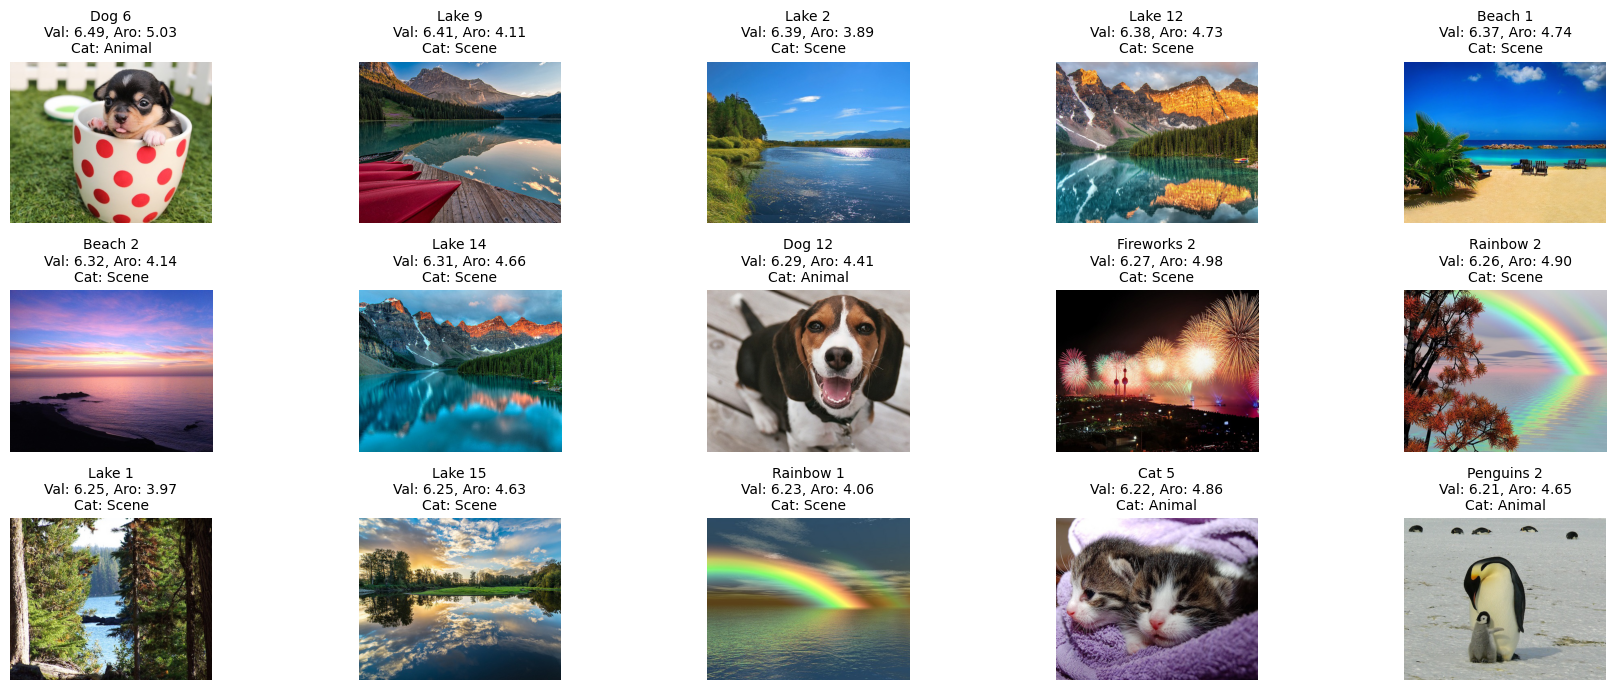

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil

# df_filtered = df[df['Valence_mean'] >= 7]
top_subset = df.nlargest(15, ['Valence_mean', 'Arousal_mean']) 

fig, axes = plt.subplots(3, 5, figsize=(18, 7))
axes = axes.ravel()

os.makedirs('positive', exist_ok=True)
os.makedirs('negative', exist_ok=True)

for i, (_, row) in enumerate(top_subset.head(15).iterrows()):
    theme = row['Theme']
    category = row['Category']
    valence = row['Valence_mean']
    arousal = row['Arousal_mean']

    for ext in ['.jpg', '.png', '.jpeg']:
        path = os.path.join(oasis_path, theme + ext)
        if os.path.exists(path):
            img_path = path
            break
    else:
        continue  

    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(
        f"{theme}\nVal: {valence:.2f}, Aro: {arousal:.2f}\nCat: {category}",
        fontsize=10
    )

    filename = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join("positive", filename))

plt.tight_layout()
plt.show()

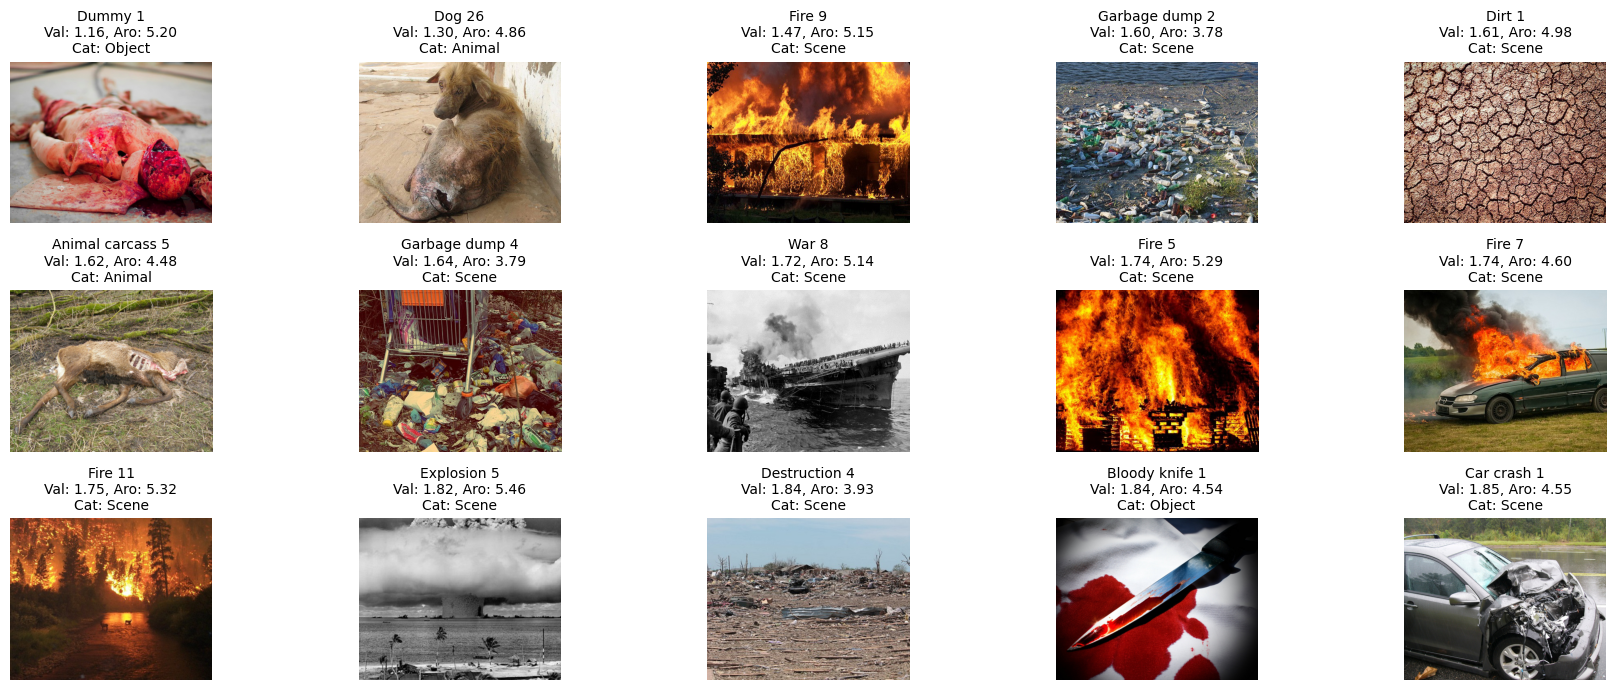

In [7]:
df_filtered = df[(df['Category'].str.lower() != 'person')]
bottom_subset = df_filtered.nsmallest(15, ['Valence_mean', 'Arousal_mean']) 

fig, axes = plt.subplots(3, 5, figsize=(18, 7))
axes = axes.ravel()

for i, (_, row) in enumerate(bottom_subset.head(15).iterrows()):
    theme = row['Theme']
    category = row['Category']
    valence = row['Valence_mean']
    arousal = row['Arousal_mean']

    for ext in ['.jpg', '.png', '.jpeg']:
        path = os.path.join(oasis_path, theme + ext)
        if os.path.exists(path):
            img_path = path
            break
    else:
        continue  

    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(
        f"{theme}\nVal: {valence:.2f}, Aro: {arousal:.2f}\nCat: {category}",
        fontsize=10
    )

    filename = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join("negative", filename))

plt.tight_layout()
plt.show()

C:\Users\catra\AppData\Local\Temp\ipykernel_5916\270063519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance'] = np.sqrt(


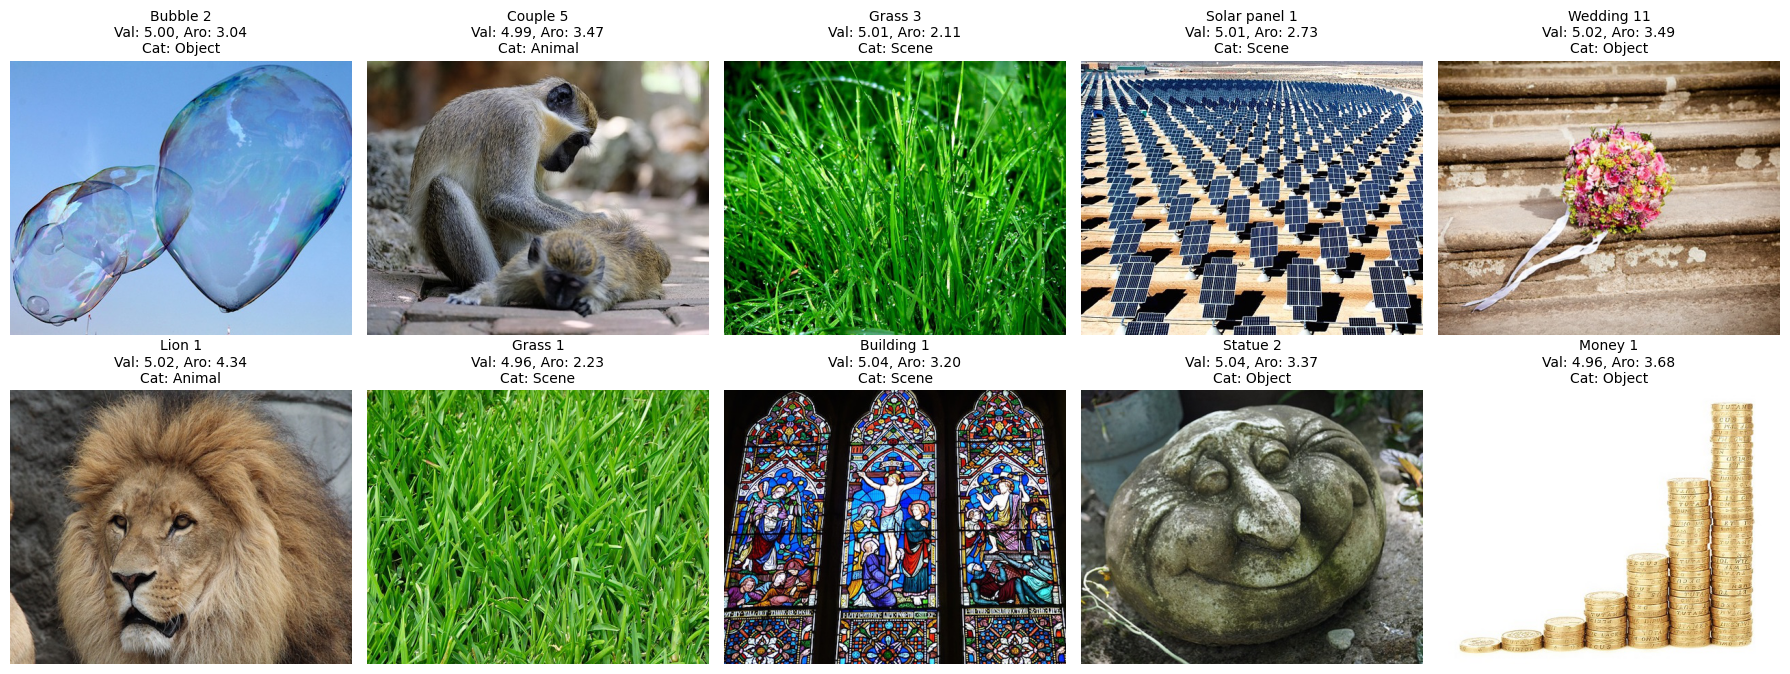

In [8]:
import numpy as np

df_filtered['distance'] = np.sqrt(
    (df_filtered['Valence_mean'] - 5)**2
)

top_subset = df_filtered.nsmallest(10, ['distance', 'Arousal_mean']) 

fig, axes = plt.subplots(2, 5, figsize=(18, 7))
axes = axes.ravel()

os.makedirs('neutral', exist_ok=True)

for i, (_, row) in enumerate(top_subset.head(15).iterrows()):
    theme = row['Theme']
    category = row['Category']
    valence = row['Valence_mean']
    arousal = row['Arousal_mean']

    for ext in ['.jpg', '.png', '.jpeg']:
        path = os.path.join(oasis_path, theme + ext)
        if os.path.exists(path):
            img_path = path
            break
    else:
        continue  

    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(
        f"{theme}\nVal: {valence:.2f}, Aro: {arousal:.2f}\nCat: {category}",
        fontsize=10
    )

    filename = os.path.basename(img_path)
    shutil.copy(img_path, os.path.join("neutral", filename))

plt.tight_layout()
plt.show()